# Titanic Project

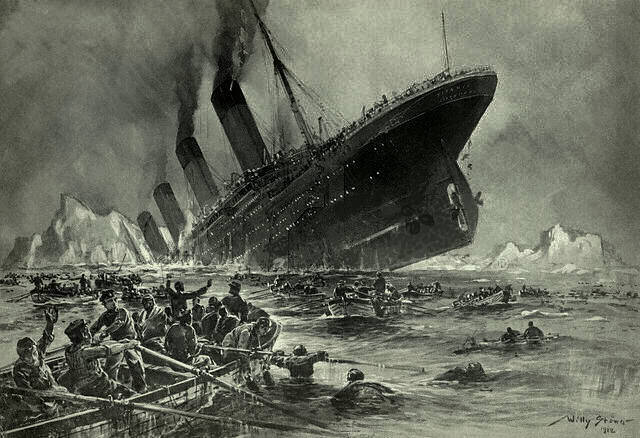

# Notebook- Goal
* The main goal of this project is to predict whether a passenger survived or not based on the given features.

# Notebook- Content
* Basic Understanding of Data.
* Expolatory Data Analysis (EDA).
* Feature Engineering.
* Data Preprocessing.
* Model Building.
* Model Performacne Check.
* Best Performing Model Selecions.
* Hyper-Parameter Tunning.
* Predicting Test Data.
* Submitting Prediction.

# Import the necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

sns.set(style="darkgrid",font_scale=1.5)
sns.set_palette("Set2")
pd.set_option("display.max.rows",None)
pd.set_option("display.max.columns",None)
 

## Load the dataset.

In [2]:
train_df =pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Feature- Description
* PassengerId: This feature indicates the Id of each passengers.
* Survived: this features indicates whether the passenger has survived or not. 0 means Not- Survived & 1 means Survived
* pclass: A proxy for socio-economic status (SES) 1st = Upper, 2nd = Middle, 3rd = Lower
* Name: This feature is indicating the names of individual passengers.
* Sex: This feature is indicating the gender of the passengers.
* age: this feature is indicating the age of individual passengers.
* sibsp: The dataset defines family relations in this way...Sibling = brother, sister, stepbrother, stepsister, Spouse = husband, wife (mistresses and fiancés were ignored)
* parch: The dataset defines family relations in this way... Parent: = mother, father, Child: = daughter, son, stepdaughter, stepson. Some children travelled only with a nanny, therefore parch=0 for them.
* Ticket: This feature is showing the Ticket Number of each passengers.
* Fare: The amount paid by the passenger to get the Ticket.
* Cabin: This feature is indicating the cabin deck & number of individual passengers.
* Embarked: Embarked implies where the traveler mounted from. There are three possible values for Embark — Southampton, Cherbourg, and Queenstown. More than 70% of the people boarded from Southampton

# Basic Understanding of Data.

### 1. check the shape of both train and test dataset

In [3]:
print("The shape of Training dataset is:", train_df.shape)
print("The shape of Testing dataset is:", test_df.shape)


The shape of Training dataset is: (891, 12)
The shape of Testing dataset is: (418, 11)


## 2. Show training and testing data


In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Observation
* We can observe that we do not have Survived features in Test dataset
* So we to build model using training dataset and predict that feature to our test data

### 3. Getting besic info

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Observation
* We can observe that only Name, Sex, Ticket, Cabin & Embarked features are having data-type object.
* But in reality Survived & Pclass are also showing categorical values.
* So befor EDA we will replace those values with their respective categorical values.

### 4. Descriptive Statistical Analysis of Numerical Features on Training Data.

In [7]:
train_df.describe(percentiles=[0.25, 0.50, 0.60, 0.65, 0.70, 0.75, 0.80]).T

,count,mean,std,min,25%,50%,60%,65%,70%,75%,80%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,535.0000,579.5,624.0,668.5,713.0000,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,0.0000,1.0,1.0,1.0,1.0000,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0000,3.0,3.0,3.0,3.0000,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,31.8000,34.0,36.0,38.0,41.0000,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,0.0000,0.0,1.0,1.0,1.0000,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0000,0.0,0.0,0.0,1.0000,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,21.6792,26.0,27.0,31.0,39.6875,512.3292


# Observation
* In PassengerId feature we can observe there are total 891 unique values. So it's better to drop this featrue.
* In Survived feature we can observe that almost 60% of data is 0 so we can say most of the passengers didn't Survived
* In PClass featue we can observe that maximum value is 3 which means most of the passengers were from Lower Class and we can also observe that minimum value is 1 which means Upper Class passenger were very less.
* In Age feature we can observe 25%, 50% & 75% percentiles values as 20, 28 & 31 So we can say that most of the passengers were between these ages.
* In SibSp feature we can observe that almost 60% percentile of data is 0. So we can say that most of the passengers are travelling without their Siblings or Spouse
* In Parch feature we can observe that almost 75% percentile of data is 0. So we can say that most of the passengers are travelling without their Parent or Childen
* In Fare feature we can observe that some passengers travelled without any cost as the minimum value is 0

### 5. Checking Cardinality of Categorical Features in Both Datasets

In [8]:
print('_'*100)
print('The Cardinality of Categorical Features in Training Dataset is: ')
print(train_df.select_dtypes('object').nunique())
print('_'*100)

print('The Cardinality of Categorical Features in Test Dataset is: ')
print(train_df.select_dtypes('object').nunique())
print('_'*100)

____________________________________________________________________________________________________
The Cardinality of Categorical Features in Training Dataset is: 
Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64
____________________________________________________________________________________________________
The Cardinality of Categorical Features in Test Dataset is: 
Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64
____________________________________________________________________________________________________


# Observation
* We can oberver that Name & Ticket are having high Cardinailty.
* We normally drop features having high cardinality but in this project we will try to do Feature Engineeering on those features.
* So that we can avoid Data Loss because more amount of data leads to more accurate prediction by the model.

### 6. Checking duplicates in our data

In [9]:
print(f"Duplicate in Training Data is:{train_df.duplicated().sum()},({100*train_df.duplicated().sum()/len(train_df)}%)")
print(f"Duplicate in Training Data is:{test_df.duplicated().sum()},({100*test_df.duplicated().sum()/len(test_df)}%)")


Duplicate in Training Data is:0,(0.0%)
Duplicate in Training Data is:0,(0.0%)


# Observation
* We can clearly observe that we don't have any duplicate values in our both training & testing datasets.
* So we can say that we don't have any type of Data lekeage in our both datasets.

### 7. Checking Total Number & Percentage of Missing Values in Training Datasets.

In [10]:
df = train_df.isnull().sum()[train_df.isnull().sum()>0].to_frame().rename(columns={0: 'Number of missing values'})
df['% of Missing values'] = round((df['Number of missing values']/len(train_df)*100), 2)
df

,Number of missing values,% of Missing values
Age,177,19.87
Cabin,687,77.10
Embarked,2,0.22


In [11]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Observation
* In Cabin feature we can observe that almost 77% of values are NaN values.So it's better we drop this feature from our Training Data.
* In Embarked feature we can observe that there are only 2 NaN values. So we replace those values with suitable values.
* In Age feature we can observe that almost 20% of values are NaN values. But we can't drop this feature because it seems relevant feature with our target data. So we will fill those values with suitable values.

### 8. Checking Total Number & Percentage of Missing Values in Test Datasets.

In [12]:
df = test_df.isnull().sum()[test_df.isnull().sum() > 0].to_frame().rename(columns={0:'Number of missing values'})
df['% of Missing values'] = round(df['Number of missing values']*100/(len(test_df)), 2)
df 

,Number of missing values,% of Missing values
Age,86,20.57
Fare,1,0.24
Cabin,327,78.23


# Observation
* In Cabin feature we can observe that almost 78% values are NaN values.So it's better we drop this feature from our Testing Data also.
* In Fare feature we can observe that there is only 1 NaN value. So it's betetr we replace that value with suitable value.
* In Age feature we can observe that almost 20% of values are NaN values. But we can't drop this feature because it seems relevant feature with our target data. So we will fill those values with suitable values.

# Exploratory Data Analysis

### 1. Visualizing- Target Data

In [13]:
train_df.Survived.head().to_frame()

,Survived
0,0
1,1
2,1
3,1
4,0


## Note
* We know that in Survived feature 0 means not-Survived & 1 means Survived
* So for better visualization let's replace those numerical values with their original values.

In [14]:
train_df.Survived.replace({0:"Not-Survived", 1:'Survived'}, inplace=True)

In [15]:
z = train_df.Survived.value_counts().to_frame()
z

,Survived
Not-Survived,549
Survived,342


<b>Ploting Pie-Chart & Count Plot to gain Insights</b>

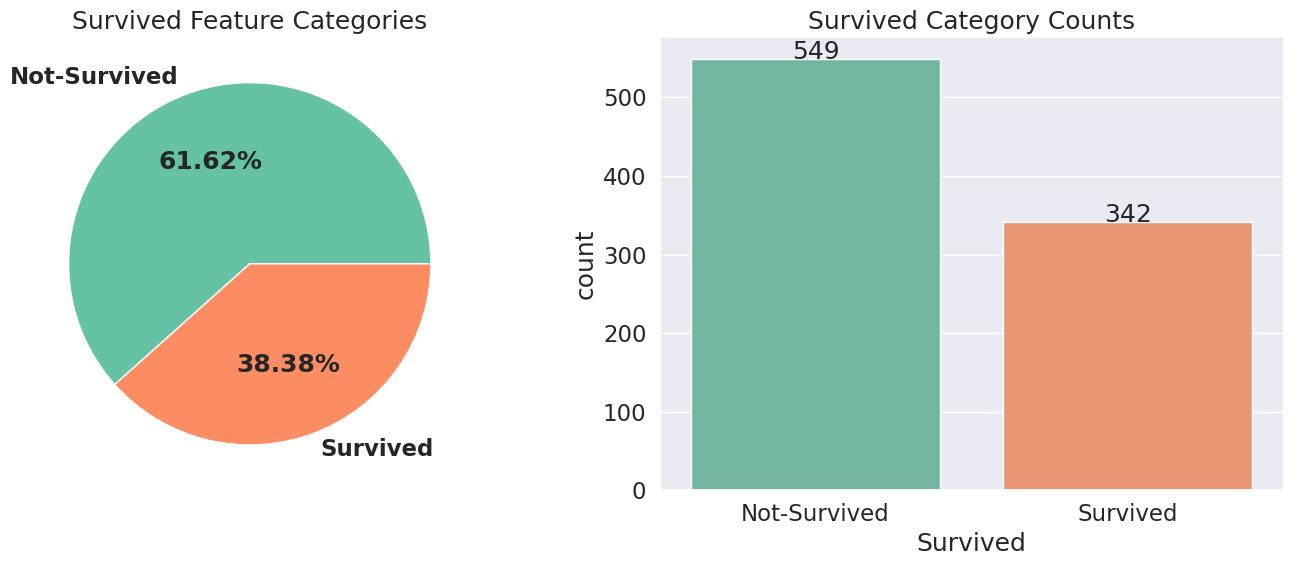

In [16]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.pie(z.values.ravel(),labels=z.index,autopct="%0.2f%%",textprops={"fontweight":"black"})
plt.title("Survived Feature Categories")

plt.subplot(1,2,2)
sns.countplot(x="Survived",data=train_df)
plt.title("Survived Category Counts")
for i,j in enumerate(z["Survived"]):
    plt.text(i,j,j,ha="center")
plt.tight_layout()
plt.show()

# Observation
* We can observe that our Survived feature is not balanced.
* So we have to use technique like over_Sampling or under_sampling.

### 2. Visualizing- Pclass Feature

In [17]:
train_df.Pclass.head().to_frame()

,Pclass
0,3
1,1
2,3
3,1
4,3


## Note
* We know that in Pclass 1 means Upper class , 2 means Middle class & 3 means Lower Class
* So better visualization let's replace those numerical values with their original values.

In [18]:
train_df.Pclass.replace({1:"Upper_class", 2:"Middle_class", 3:"Lower_class"}, inplace=True)
test_df.Pclass.replace({1:"Upper_class", 2:"Middle_class", 3:"Lower_class"}, inplace=True)

In [19]:
z = train_df.Pclass.value_counts().to_frame()
z

,Pclass
Lower_class,491
Upper_class,216
Middle_class,184


<b>Ploting Pie-Chart & Count Plot to gain Insights</b>

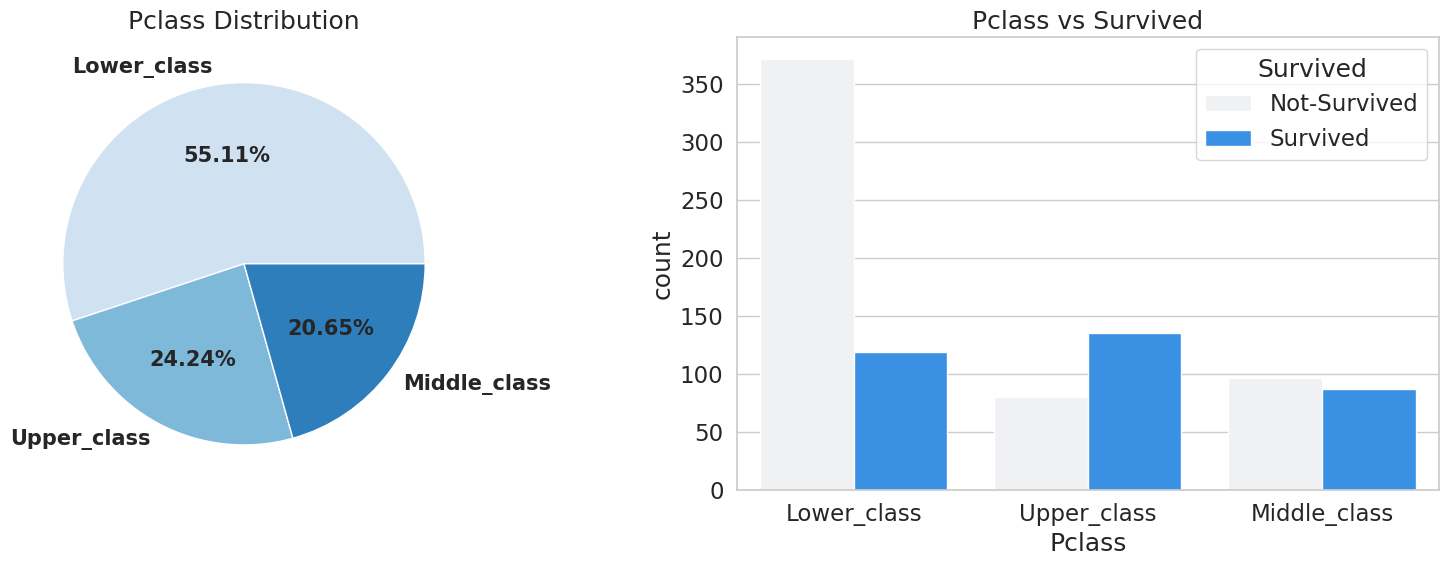

In [20]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(z)))
plt.pie(z.values.ravel(), labels=z.index.tolist(), colors=colors, autopct='%0.2f%%', textprops={'fontweight':'black', 'size':15})
plt.title("Pclass Distribution")

plt.subplot(1,2,2)
sns.countplot(x="Pclass",hue="Survived", color='dodgerblue', data=train_df)
plt.title("Pclass vs Survived")
plt.tight_layout()
plt.show()

## Observation
* From pie-chart we can clearly observe that most of the passengers were from Lower class
*  From countplot we can observe the following things:
    1. If the passenger is from Lower Class than there is very less chance of Survival
    2. If the passenger is from Middle Class than there is almost equal chance of Survival
    3. If the passengers is from Upper Class than there is High chance of Survival}

## 3. Visualizing- Sex Feature

In [21]:
train_df.Sex.unique()

array(['male', 'female'], dtype=object)

In [22]:
z = train_df.Sex.value_counts().to_frame()
z

,Sex
male,577
female,314


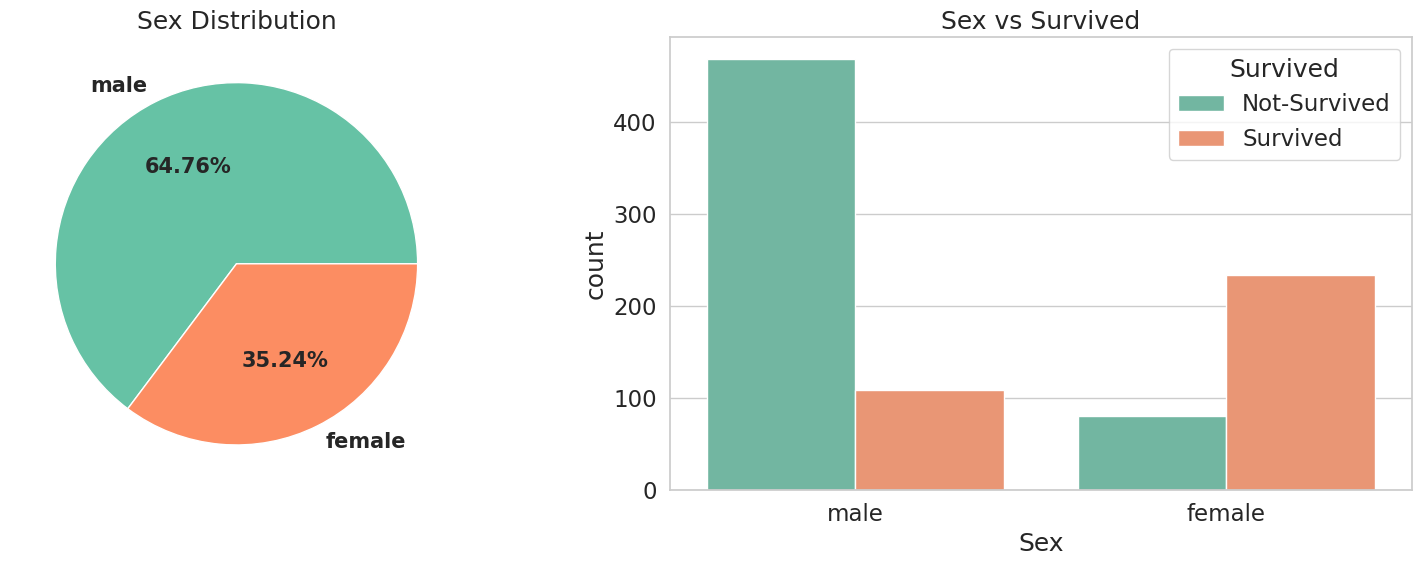

In [23]:
# sns.set_style('whitegrid')
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
# colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(z)))
plt.pie(z.values.ravel(), labels=z.index.tolist(), autopct='%0.2f%%', textprops={'fontweight':'black', 'size':15})
plt.title("Sex Distribution")

plt.subplot(1,2,2)
sns.countplot(x="Sex",hue="Survived",  data=train_df)
plt.title("Sex vs Survived")
plt.tight_layout()
plt.show()

## Observation
* From pie-chart we can clearly observe that most of the passengers are male
* From countplot we can observe following things:
    1. If the passenger is male than he has very less chance of Survival
    2. If the passenger is female than she has very high chance of Survival

## 4. Visualizing- Age Feature

In [24]:
train_df.Age.head().to_frame()

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


<b>Ploting for Age feature</b>

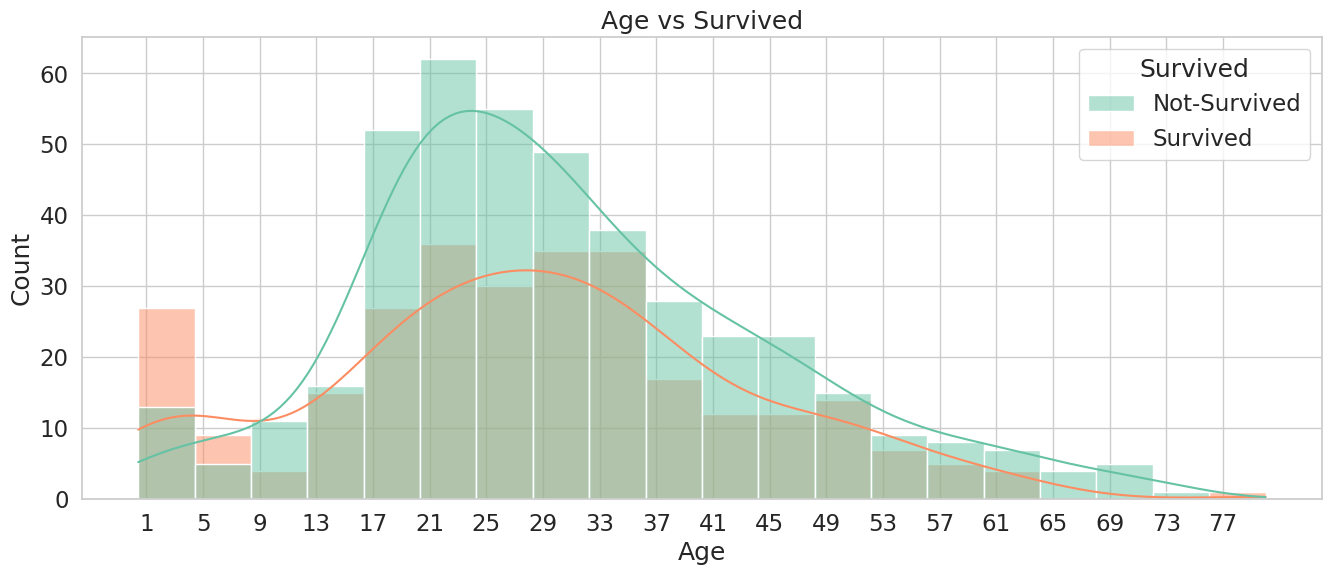

In [25]:
plt.figure(figsize=(16,6))
sns.histplot(x='Age', hue='Survived', data=train_df, kde=True)
plt.title('Age vs Survived')
plt.xticks(list(range(1, 81, 4)))
plt.show()

## Observation

* We can easily observe that most of the passenger were between 20 to 35.
* We can observe that age from 0-10 are highly Survived when compared with Not Survived. Specially for small childrens.
* We can observe that age from 11 to 65 are comparatively less Survived.
* We can observe that passengers having age more than 65 have negligible chance of being Survived.

Insights

* We can do Feature Engineering to create a new feature Age Category by splitting age into different categories
* We will do that in the Feature Engineering Section

## 5. Visualizing- SibSp Feature

In [26]:
train_df.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8])

### Note

* Here the numbers are showing the passengers travelling with hom many spouse or siblings.

In [27]:
z = train_df.SibSp.value_counts().to_frame()
z

,SibSp
0,608
1,209
2,28
4,18
3,16
8,7
5,5


### Plotting Pie-chart and Countplot to gain Insights

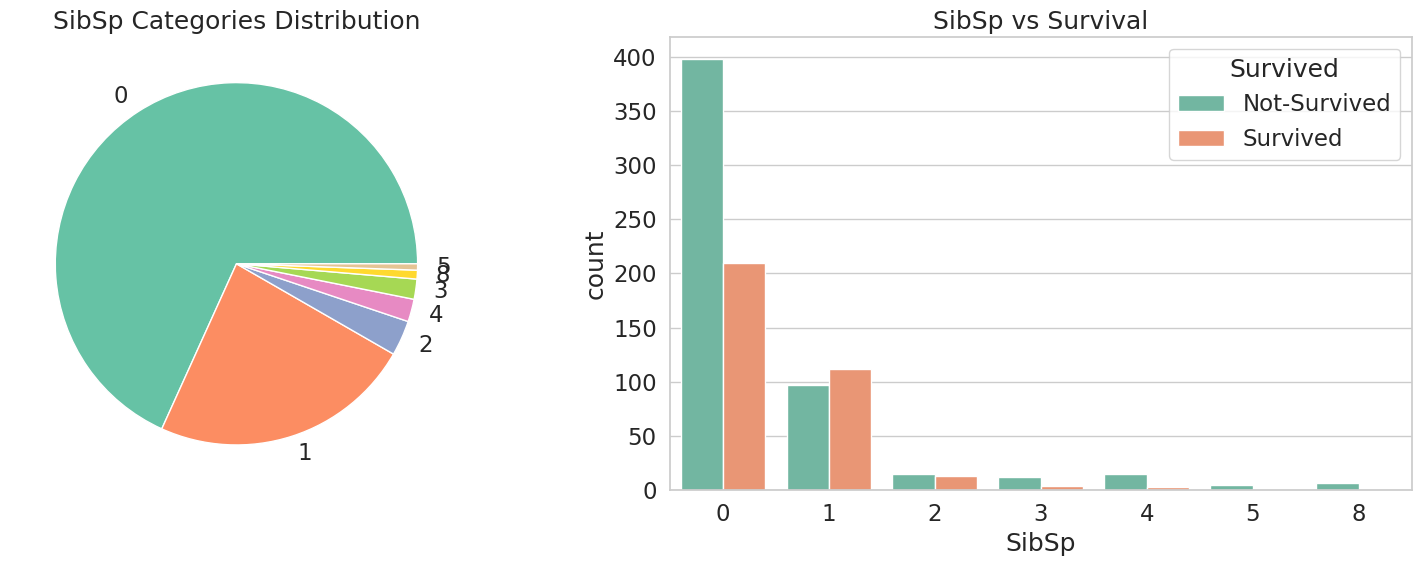

In [28]:
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
plt.pie(z["SibSp"],labels=z.index.tolist())
plt.title('SibSp Categories Distribution')

plt.subplot(1,2,2)
sns.countplot(x="SibSp", hue='Survived', data=train_df)
plt.title('SibSp vs Survival')
plt.tight_layout()
plt.show()


## Observation

* From piechart we can observe that most of the passenger are travelling without any sibling or spouse
* From coutplot we can observe following things:

   * Passengers travelling with 0 sibling/spouse have almost chance of Survival
   * Passengers travelling with 1 sibling/spouse have high chance of Survival
   * Passengers travelling with 2 sibling/spouse have almost equal chance of Survival
   * Passengers travelling with more than 2 sibling/spouse have almost negligible chance of Survival

## Insights

* We can do Feature Engineering to create a new feature SibSp Category in which we can indicate the following things.

   * If the passengers is travelling with 0 sibling/spouse than we can categorize them as No Sibling/Spouse
   * If the passengers is travelling with 1 or 2 sibling/spouse than we can group them together as Average Sibling/Spouse
   * If the passengers is travelling with more than 2 sibling/spouse than we an group them as Extra Sibling/Spouse
   * We will do this in the Feature Engineering Section

### 6.Visualizing- Parch Feature

In [29]:
train_df.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6])

In [30]:
z = train_df.Parch.value_counts().to_frame()
z

,Parch
0,678
1,118
2,80
5,5
3,5
4,4
6,1


#### Plotting Pie-chart and Countplot to gain Insights

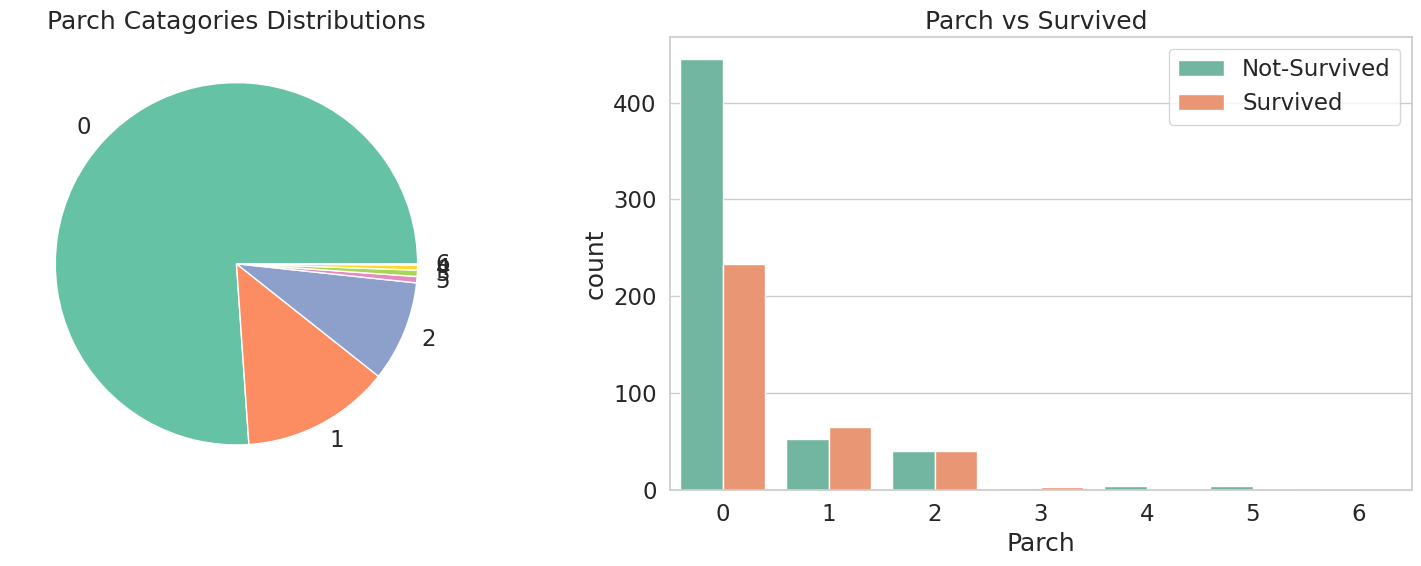

In [31]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
# plt.pie(z.Parch, labels=z.index.tolist())
plt.pie(z["Parch"],labels=z.index.tolist())
plt.title("Parch Catagories Distributions")

plt.subplot(1,2,2)
sns.countplot(x='Parch', hue='Survived', data=train_df)
plt.title("Parch vs Survived ")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()



## Observation
* From pie-chart we can easily observe that almost 80% of passengers are travelling with their parents or childrens.
* From countplot we can observe following things
    1. If the passengers is travelling with 0 parent/children than they have almost half chance of Survival
    2. If the passengers is travelling with 1 or 2 parent/children than they have almost equal chane of Survival
    3. We can't make any observation for passengers travelling with more than 2 parent/children because there are very few datapoints.
#### Insights
* We can do Feature Engineering and can create a new feature Parch category which will indicate following thing:
    1. If the passengers is travelling with 0 parent/children than we can group them as one category No Parents/Children
    2. If the passengers is travelling with 1 or 2 parent/children than we can group them as Average Parents/Children
    3. Since we couldn't make any observation for passengers travelling with more than 2 parents/children so we can group them as one category Extra parents/Children
    4. We will do this in the Feature Engineering Section

## 7. Visualizing- Fare Feature

In [32]:
train_df.Fare.head().to_frame()

,Fare
0,7.2500
1,71.2833
2,7.9250
3,53.1000
4,8.0500


### Note

* This fare price is showing the amount paid to get the ticket for Travelling.
* This fare values are in $

In [33]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

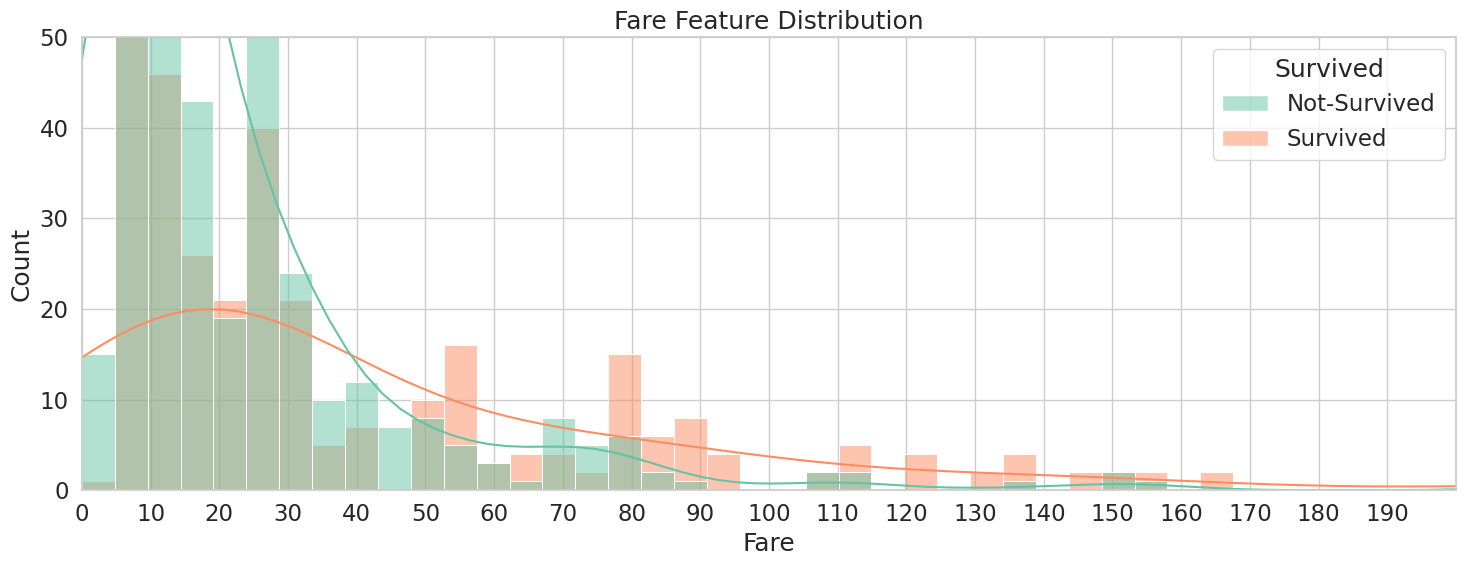

In [34]:
plt.figure(figsize=(15,6))
sns.histplot(x="Fare",hue="Survived",data=train_df,kde=True)
plt.title("Fare Feature Distribution")
plt.ylim(0,50)
plt.xlim(0,200)
plt.xticks(list(range(0,200,10)))
plt.tight_layout()
plt.show()

### 8. Visualizing- Embarked Feature

In [35]:
train_df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

### Note
* Embarked implies where the traveler mounted from.
* There are three possible values for Embark — S for Southampton, C for Cherbourg, and Q for Queenstown.
* NaN is just the missing calues present in our featrue.

In [36]:
z = train_df.Embarked.value_counts().to_frame()
z

,Embarked
S,644
C,168
Q,77


##### Ploting Pie-Chart and Countplot to gain Insights

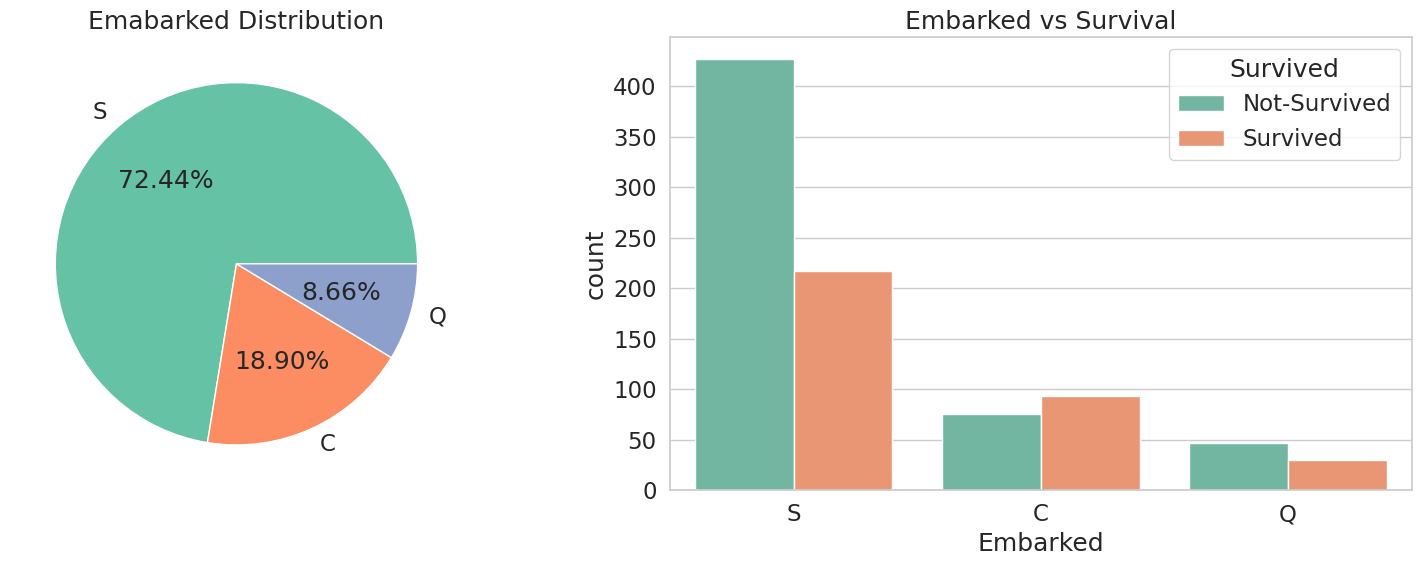

In [37]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.pie(z.Embarked, labels=z.index.tolist(), autopct='%0.2f%%')
plt.title('Emabarked Distribution')

plt.subplot(1,2,2)
sns.countplot(x='Embarked', hue='Survived', data=train_df)
plt.title('Embarked vs Survival')
plt.tight_layout()
plt.show()

### Observation
* From pie-chart we can observe that almost 73% of passengers are from Southampton
* From countplot we can observe following things:
    1. If the passengers is from Southampton than they have almost half chance of Survival
    2. If the passengers is from Cherbourg than they have High chance of Survival
    3. If the passengers is from Queenstown than they have almost equal or little less chance of Survival

### Note
* We have visualized almost all the features except following features:
    1. Name & Tickets because they have high Cardianility.
    2. Cabin because they have almost 77% of missing values.

## 9. Multivariate- Analysis

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.

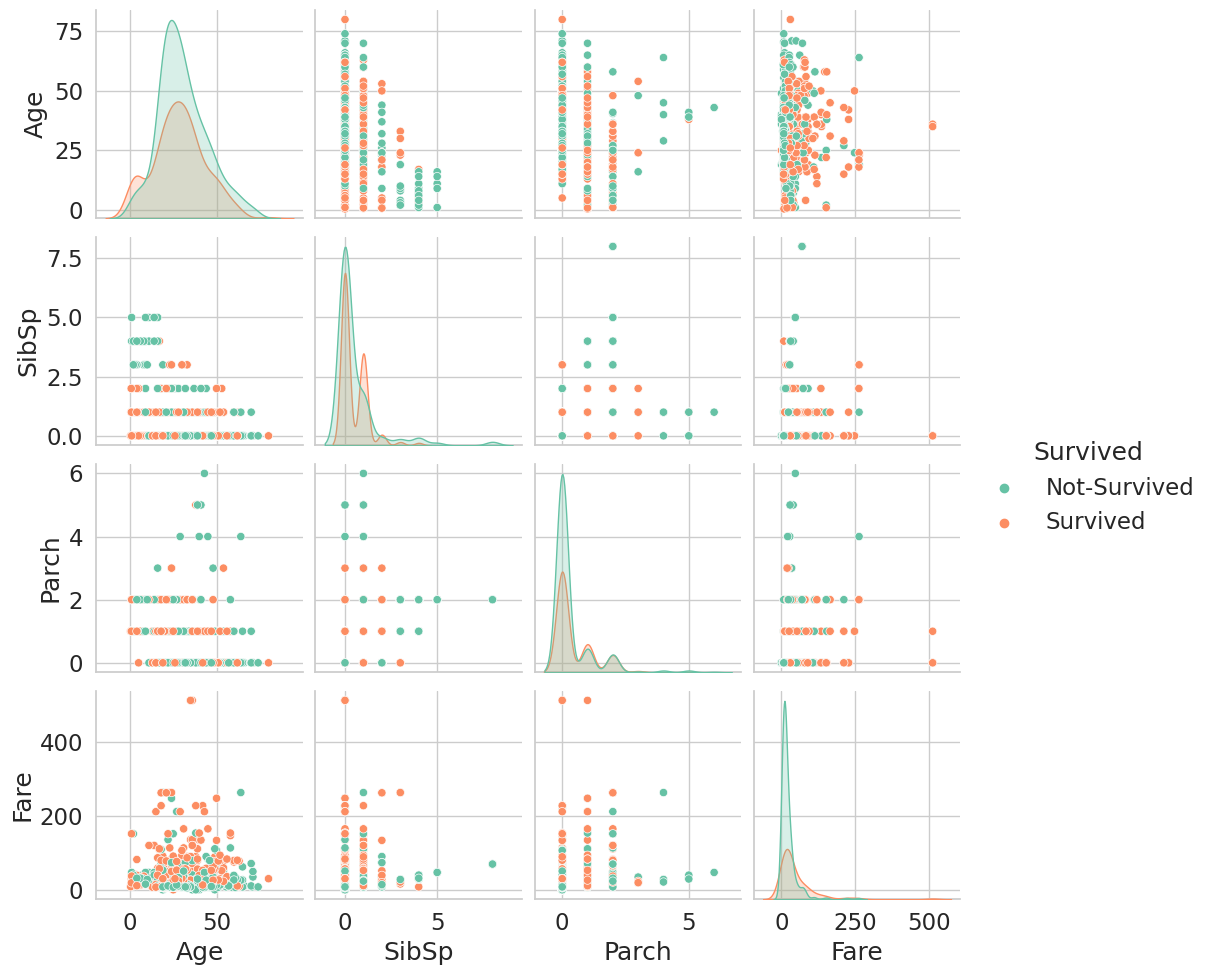

In [38]:
sns.pairplot(train_df.drop(columns='PassengerId'), hue="Survived")
plt.show()

### Observtion
* We can observe that Age feature is having kind of Normal Distrbutions. So it's seems very useful Feature.
* We can observe in Fare feature that it is having a Right Skewed Distribution. So we have use log transformation technique to make Fare feature normally distributed. So that our model can create more relevant patterns.
#### Note
* The distribution of Parch & SibSp doesn't matter because they are have values as categories.

# Feature Engineering

#### 1. Creating New Feature - Family-Size

##### Steps for feature engineering
* We know that passengerId stores the information of a single passenger.
* We also know that SibSp stores the values indicating number of siblings or spouse the passenger is travelling with.
* We also know that Parch stores the values indiccating number of parents or childrens the passenger is travelling with.
* So we create a new feature family_size by adding all the values of SibSp & Parch features of each individual passengers.

In [39]:
train_df[["Name","SibSp","Parch"]].head()

,Name,SibSp,Parch
0,"Braund, Mr. Owen Harris",1,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0
2,"Heikkinen, Miss. Laina",0,0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0
4,"Allen, Mr. William Henry",0,0


#### Creating New feature in Training Data 

In [40]:
train_df['Family_Size'] = (train_df.SibSp + train_df.Parch + 1)

#### Creating New feature in Test Data 

In [41]:
test_df['Family_Size'] = (test_df.SibSp + test_df.Parch + 1)

### Visualizing- Family-Size Feature

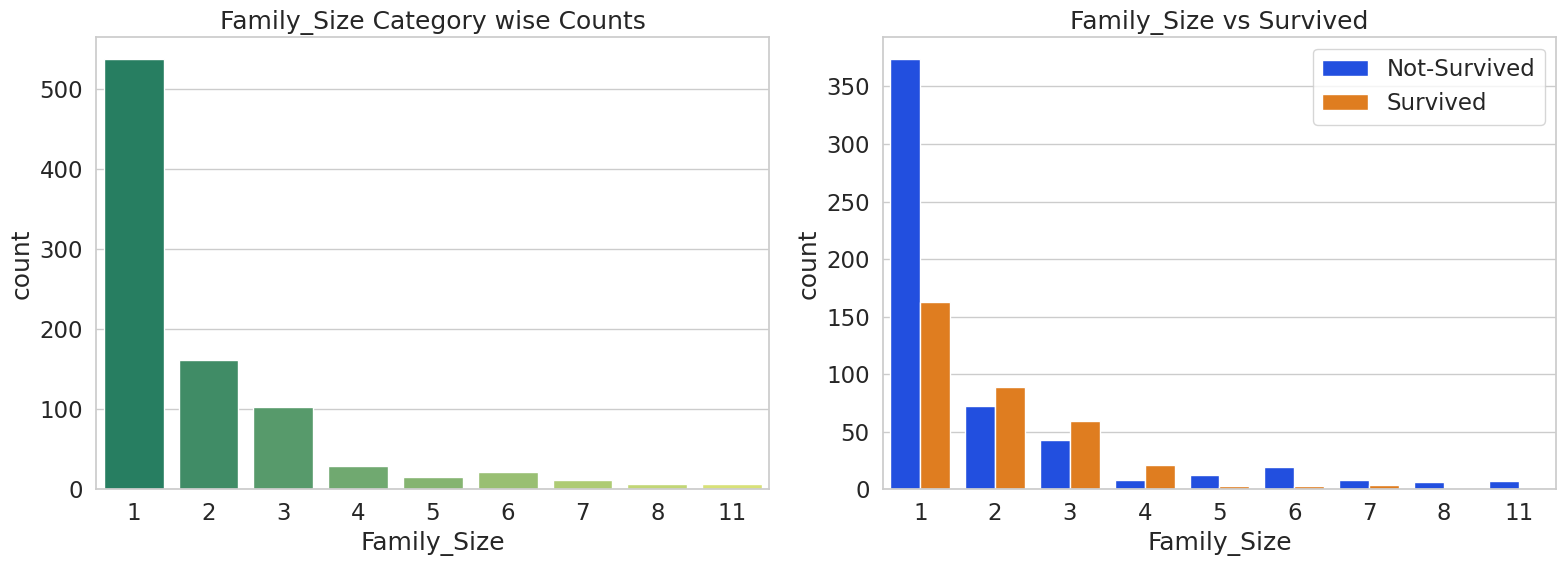

In [42]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.countplot(x="Family_Size",data=train_df,palette="summer")
plt.title("Family_Size Category wise Counts")

plt.subplot(1,2,2)
sns.countplot(x="Family_Size",hue="Survived",data=train_df,palette="bright")
plt.title("Family_Size vs Survived")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()